In [3]:
PARTMASS = 7.754657e+10  # M_sun / h
COSMO = {
    "flat": True,
    "H0": 70,
    "Om0": 0.3,
    "Ob0": 0.0469,
    "sigma8": 0.8355,
    "ns": 1,
}
RSOFT = 0.015  # Softening length in Mpc/h
BOXSIZE = 1_000  # Mpc / h

RHOCRIT = 2.77536627e+11  # h^2 M_sun / Mpc^3
RHOM = RHOCRIT * COSMO["Om0"]  # h^2 M_sun / Mpc^3


In [4]:
from os.path import abspath
from os.path import join

import h5py as h5
import numpy as np
from functions import *

SRC = abspath('/spiff/edgarmsc/simulations/susmita_sim/')
SDD = abspath('/spiff/edgarmsc/halo_model/')

In [4]:
MBINSTRS = ['13.40-13.55',
            '13.55-13.70',
            '13.70-13.85',
            '13.85-14.00',
            '14.00-14.15',
            '14.15-14.30',
            '14.30-14.45',
            '14.45-14.65',
            '14.65-15.00']

56907
39512
27293
18542
12303
7848
4904
3412
1895


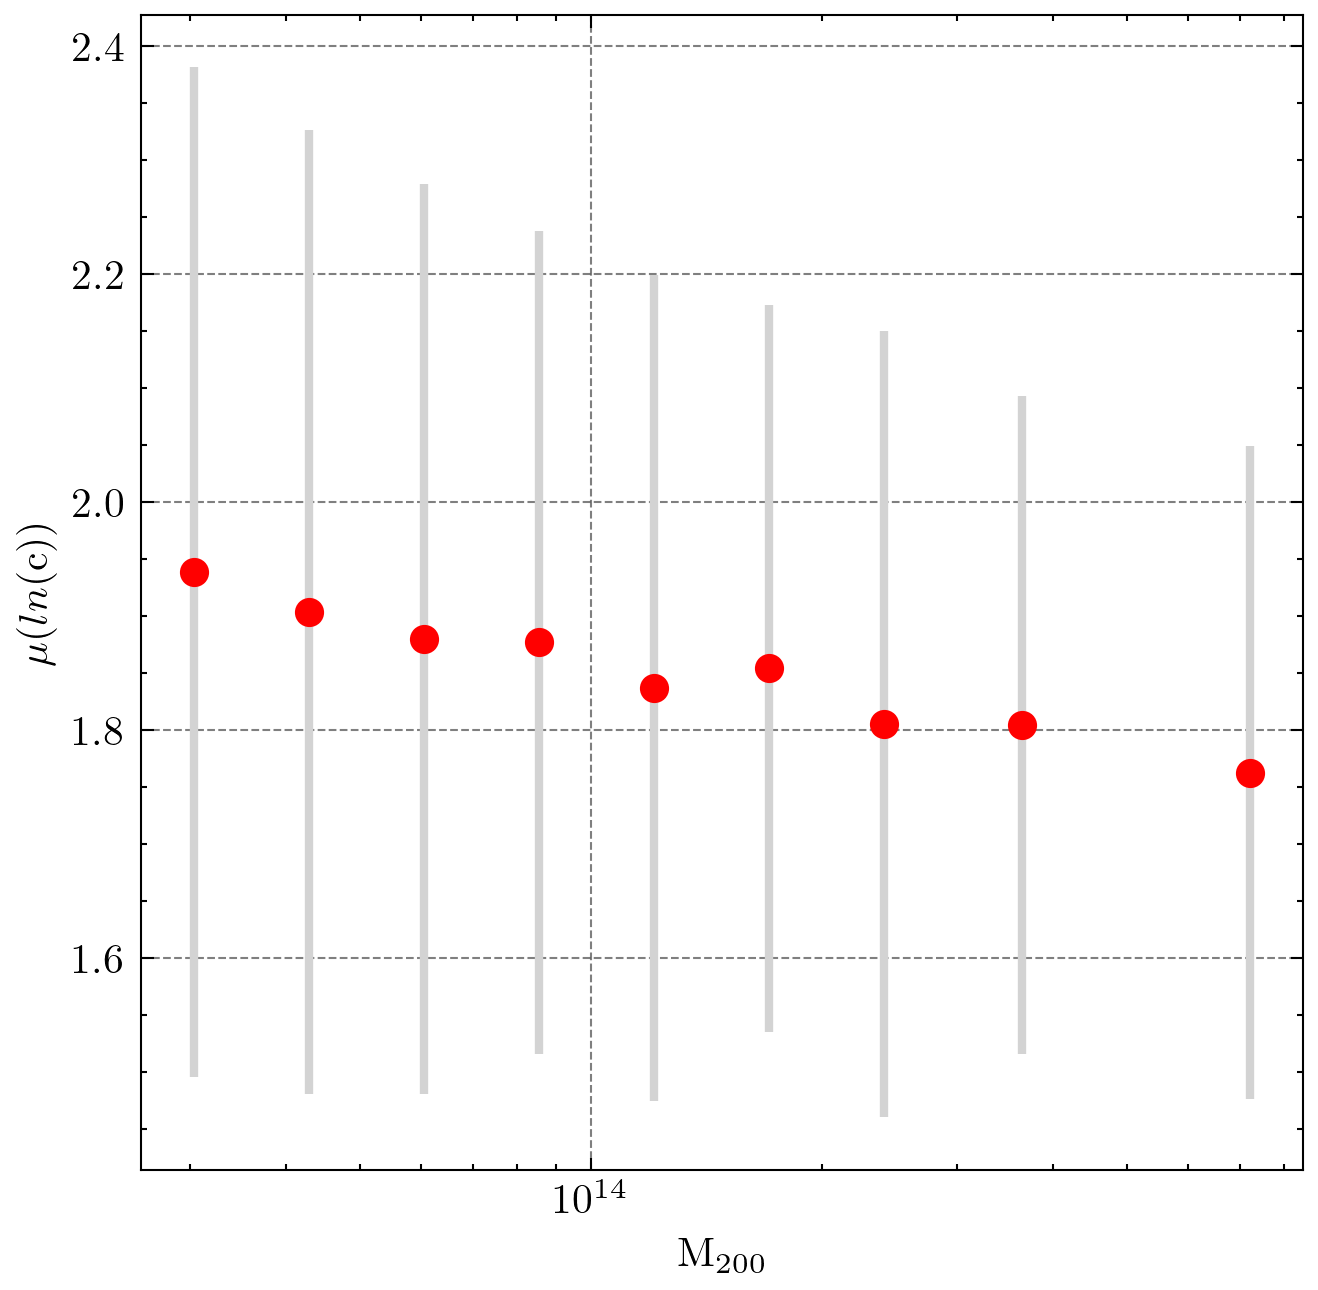

In [40]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(["science", "grid"])

fig = plt.figure(figsize=(5, 5), dpi=300)
temp = np.load('lncvirs.npy')
mu = []
mass = []
st = []
for arr in MBINSTRS:
    up, lo = arr.split('-')
    mass.append(np.mean([10**float(up), 10**float(lo)]))
    temp2 = temp[(np.log10(temp[:, 0]) > float(up)) & (float(lo) > np.log10(temp[:, 0]))]
    print(len(temp2))
    mu.append(np.mean(temp2[:, 1]))
    st.append(np.std(temp2[:, 1]))
    # plt.hist((temp2[:, 1]))
    # plt.show()
plt.errorbar(mass, mu, st, fmt='o', color='red', ecolor='lightgray', elinewidth=2)
plt.ylabel(r'$\mu(ln(\rm{c}))$')
plt.xlabel(r'$\rm{M}_{200}$')
plt.xscale('log')
plt.show()

<KeysViewHDF5 ['HID', 'Morb', 'R200', 'chi2', 'rh', 'rho']>
59461.0


48092.0
31726.0
21061.0
13546.0
8150.0
4956.0
3303.0
1749.0


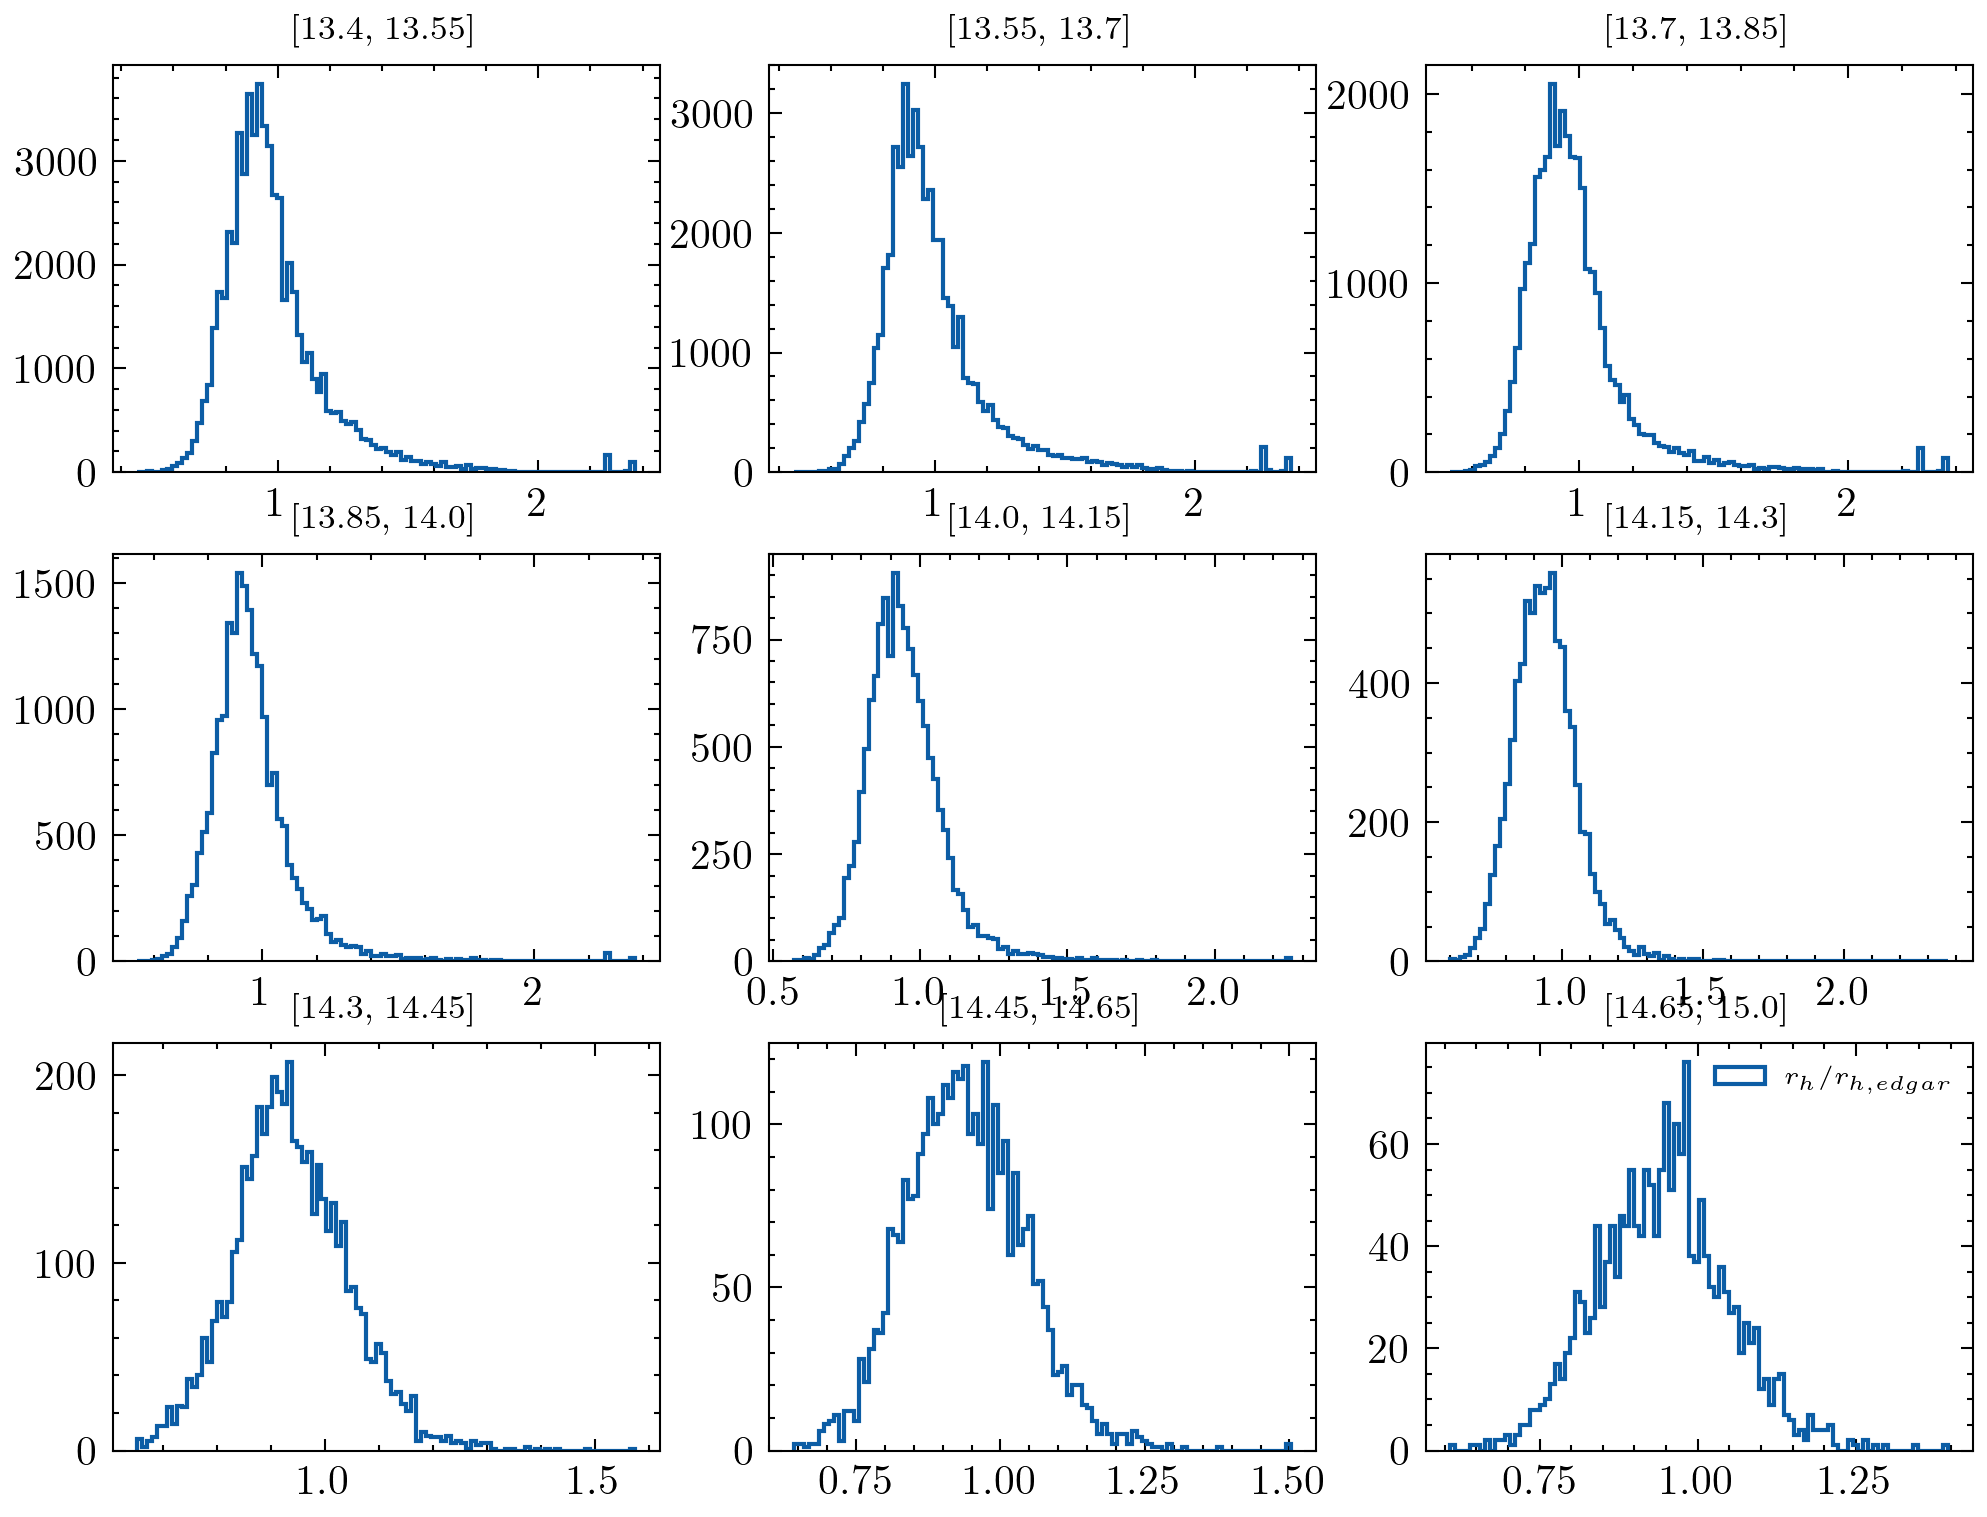

In [12]:
from textwrap import fill
import h5py as h5
import matplotlib.pyplot as plt
import numpy as np

plt.style.use(['science'])

MBINEDGES_RAW = [13.40, 13.55, 13.70, 13.85, 14.00, 14.15, 14.30, 14.45, 14.65, 15.00]
# take 10th power of it
MBINEDGES = np.power(10, MBINEDGES_RAW)
PIVOT_MASS = 1e14

with h5.File('out/rh_bestfits.h5', 'r') as hdf:
    print(hdf.keys())
    morb = hdf['Morb'][:]
    rh = (hdf['rh'][:] / 1000) * (morb / PIVOT_MASS)**(0.221)
    rh_edgar = (843.8 / 1000) * (morb / PIVOT_MASS)**(0.221)
    rho = hdf['rho'][:]
    rh_chisq = hdf['chi2'][:]

with h5.File('out/a_bestfits.h5') as hdf:
    a = hdf['a'][:]
    a_edgar = 0.038
    a_chisq = hdf['chi2'][:]


with h5.File('out/alphainf_bestfits.h5') as hdf:
    alpha_inf = hdf['alpha_inf'][:] * (morb / PIVOT_MASS)**(-0.053)
    alpha_inf_edgar = 2.021 * (morb / PIVOT_MASS)**(-0.053)
    alpha_inf_chisq = hdf['chi2'][:]

fig = plt.figure(figsize=(8, 6), dpi=300)

vars = []

for bin in range(MBINEDGES.shape[0] - 1):
    plt.subplot(3, 3, bin + 1)

    mask = (MBINEDGES[bin] < morb) & (morb < MBINEDGES[bin + 1])

    counts, _, _ = plt.hist(rh[mask] / rh_edgar[mask], bins=100, density=False, fill=False, histtype='step', label=r'$r_h/r_{h,edgar}$')
    print(counts.sum())
    # plt.hist(a[mask] / a_edgar, bins=100, density=False, fill=False, histtype='step', label='a/a_edgar')
    # plt.hist(alpha_inf[mask] / alpha_inf_edgar[mask], bins=100, density=False, fill=False, histtype='step', label=r'$\alpha_{\infty}/\alpha_{\infty,edgar}$')
    # plt.hist(rh_chisq[mask], bins=np.logspace(-1, 2.5, num=50, base=10), density=False, fill=False, histtype='step', label='Chisq r_h')
    # plt.hist(a_chisq[mask], bins=np.logspace(-1, 2.5, num=50, base=10), density=False, fill=False, histtype='step', label='Chisq a')
    # plt.hist(alpha_inf_chisq[mask], bins=np.logspace(-1, 2.5, num=50, base=10), density=False, fill=False, histtype='step', label='Chisq alpha_inf')

    # plt.xlim((0, 200))
    # plt.xscale('log')
    # plt.yscale('log')

    plt.title(fill(MBINEDGES_RAW[bin:bin + 2].__str__(), 20), fontsize=8)

    # calculate varience of each historgram
    vars.append([np.var(rh[mask]/rh_edgar[mask]), np.var(a[mask] / a_edgar), np.var(alpha_inf[mask] / alpha_inf_edgar[mask])])

    # if bin == 6:
        # plt.xlabel(r'$r_{\rm{h}}$')
        # plt.xlabel(r'$r_{\rm{h}} / r_{\rm{h, Edgar}}$')
plt.legend(prop={'size': 6})
plt.show()

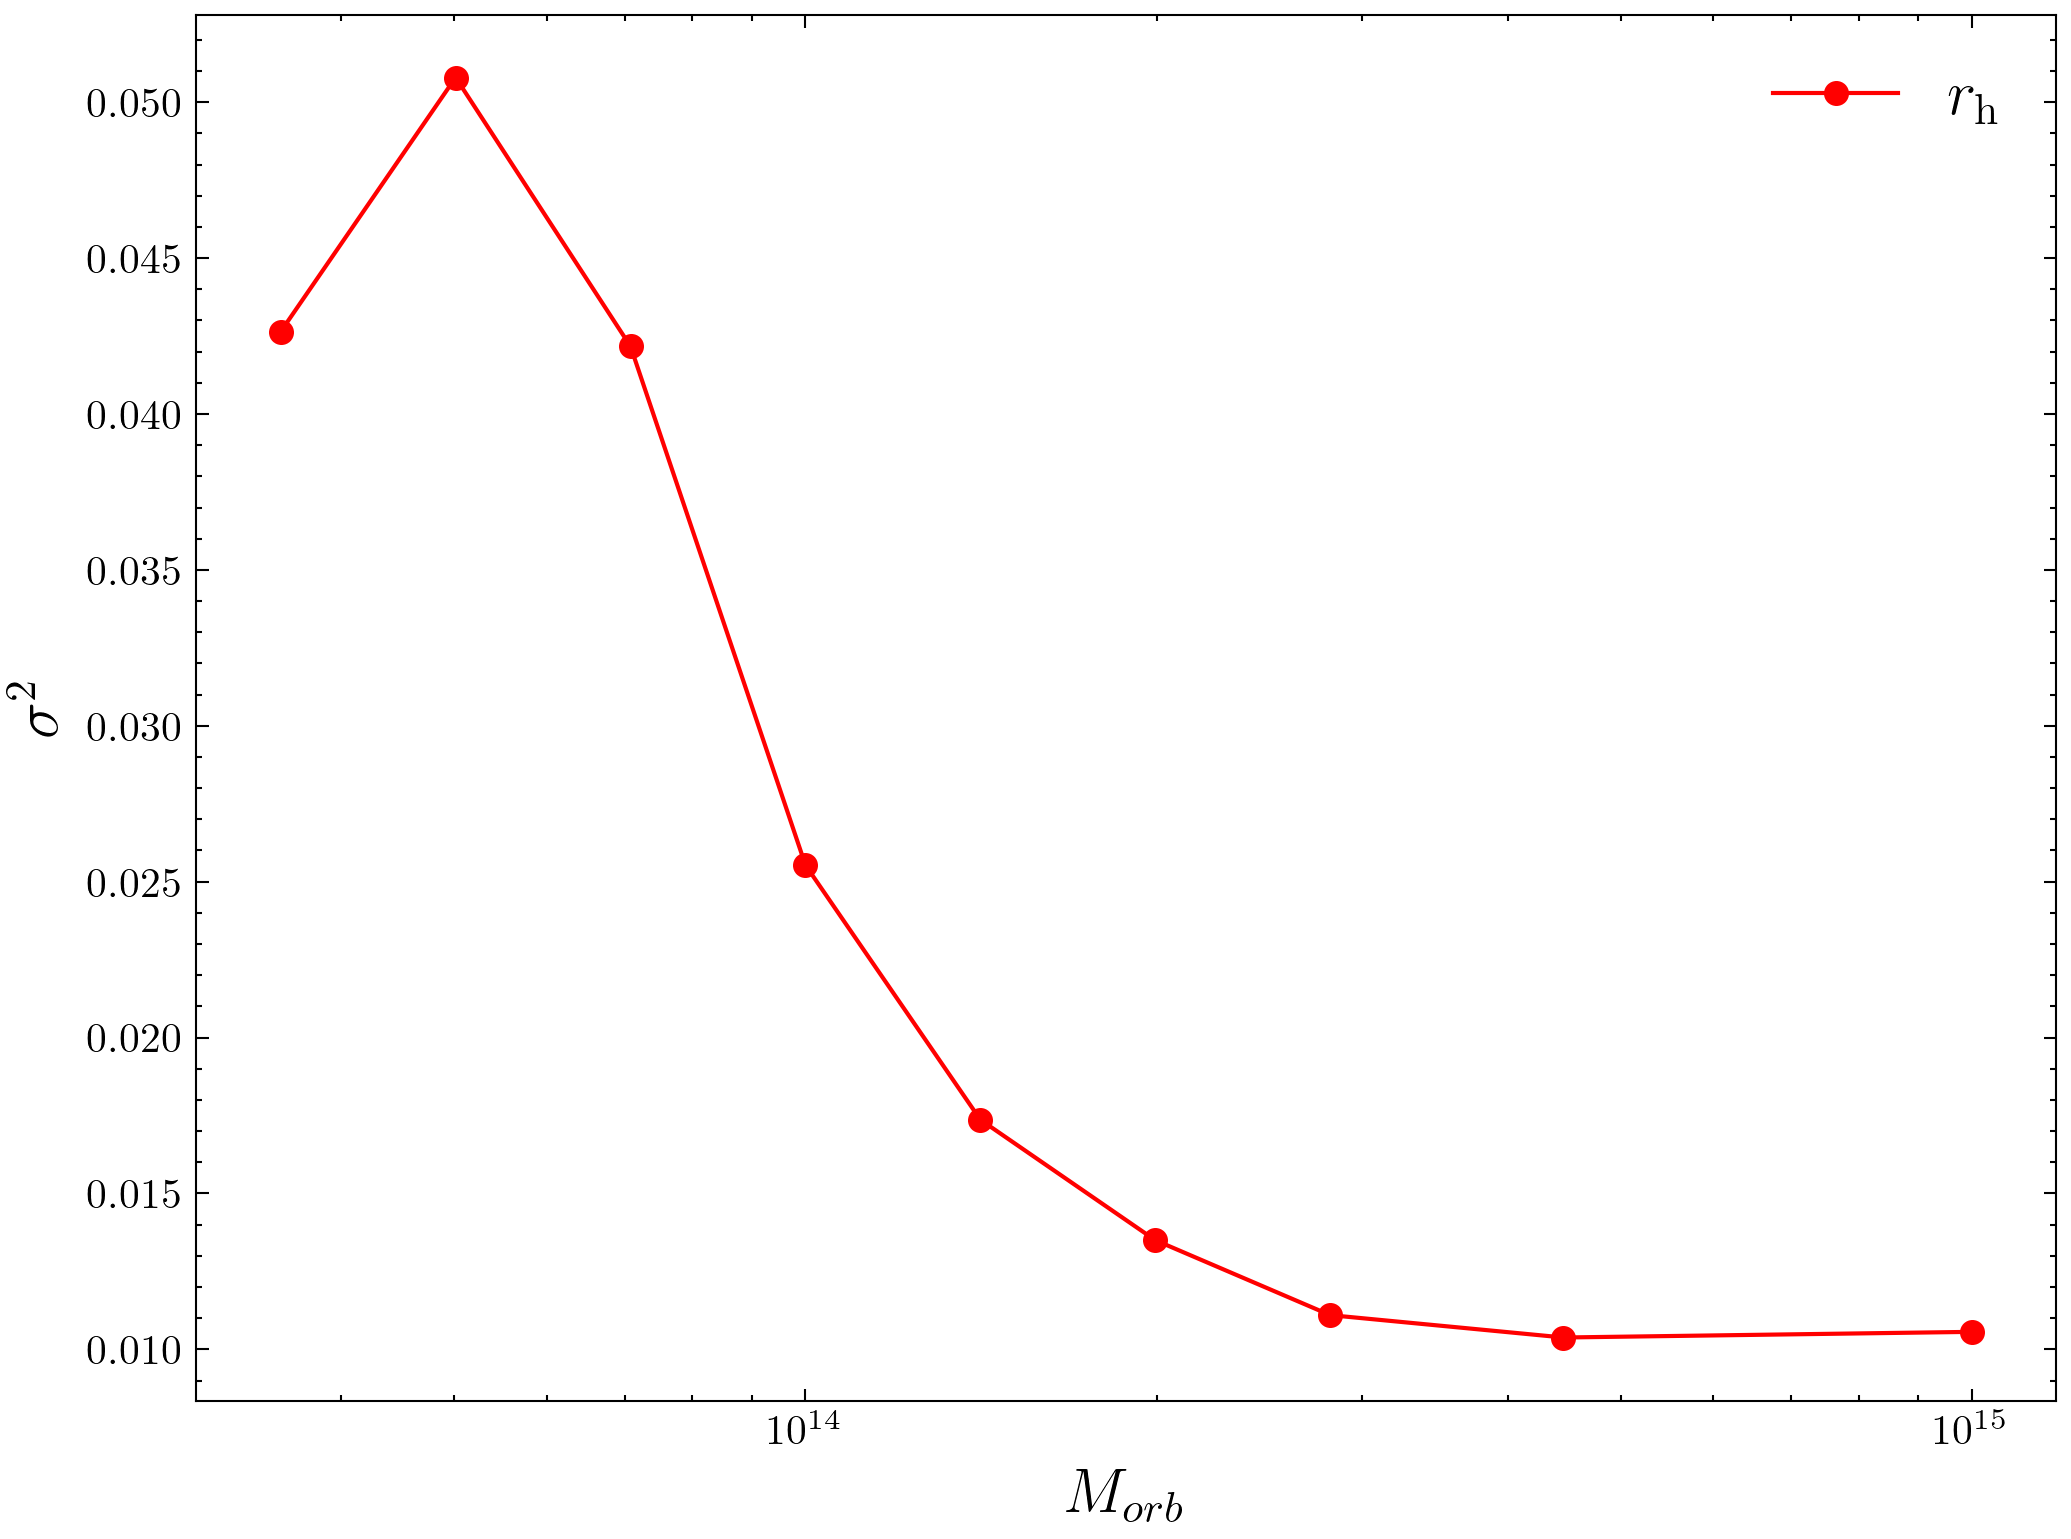

In [4]:
# plot varience vs mass
vars = np.array(vars)
plt.figure(figsize=(8, 6), dpi=300)

# plot varience vs mass
plt.plot(MBINEDGES[1:], vars[:, 0], 'ro-', label=r'$r_{\rm{h}}$', markersize=5)
# plt.plot(MBINEDGES[1:], vars[:, 1], 'ko-', label='a', markersize=5)
# plt.plot(MBINEDGES[1:], vars[:, 2], 'go-', label=r'$\alpha_{\infty}$', markersize=5)

plt.xscale('log')
plt.xlabel(r'$M_{orb}$', fontsize=15)
plt.ylabel(r'$\sigma^2$', fontsize=15)
plt.legend(prop={'size': 15})
plt.show()

1749


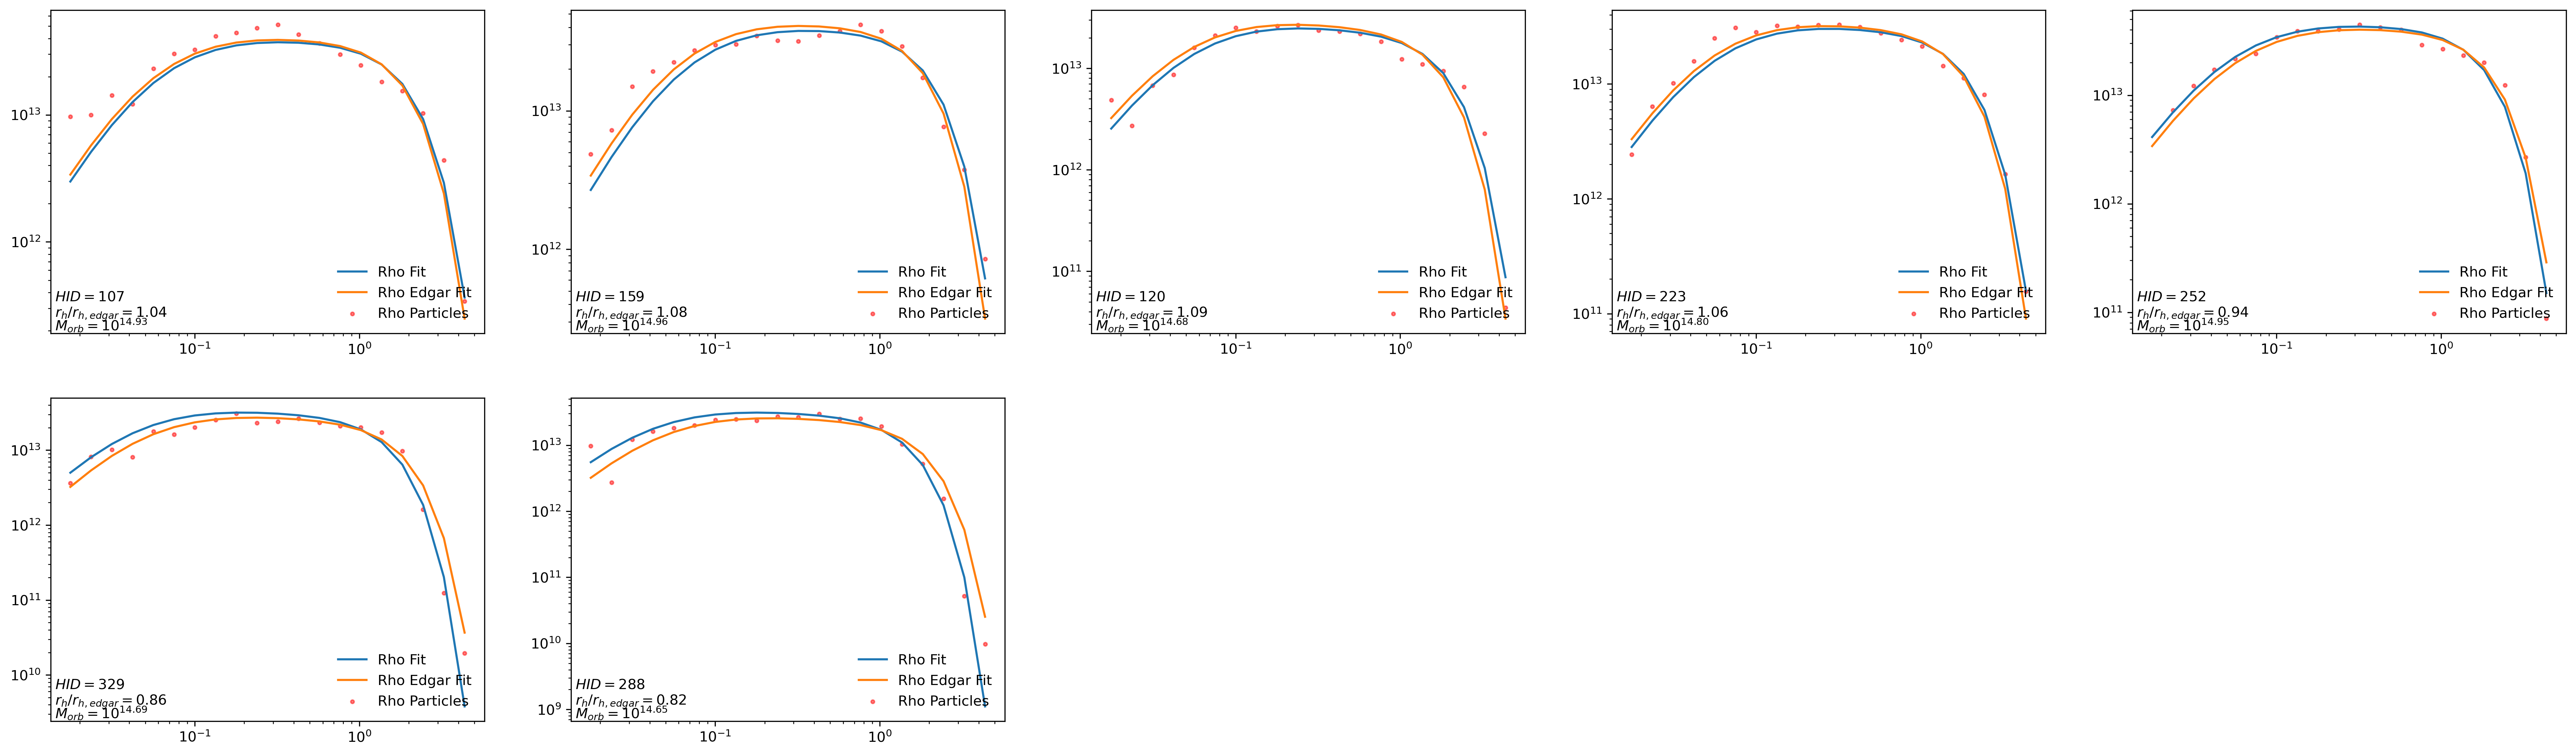

In [10]:
from constants import *
from functions import *
from imports import *

with h5.File('out/rh_bestfits.h5', 'r') as hdf:
    ids = hdf['HID'][:]
    morb = hdf['Morb'][:]
    rh = (hdf['rh'][:] / 1000) * (morb / PIVOT_MASS)**(0.221)
    rh_edgar = (843.8 / 1000) * (morb / PIVOT_MASS)**(0.221)
    rho = hdf['rho'][:]

# with h5.File('out/a_bestfits.h5') as hdf:
#     a = hdf['a'][:]
#     a_edgar = 0.038
#     morb = hdf['Morb'][:]
#     ids = hdf['HID'][:]
#     rho = hdf['rho'][:]

mask = np.where(((rh / rh_edgar) < 1.5) & ((rh/ rh_edgar) > 0.5) & (morb > 10**14.65) & (morb < 10**15))
print(len(mask[0]))
# mask = np.where(ids == 103677)
# mask = np.where((morb > 1e14) & (morb < 10**14.15) & (a/a_edgar > 1.5) & (a/a_edgar < 2.5))
# randomly select 25 halos
# mask = np.random.choice(mask[0], 25, replace=False)

plt.figure(figsize=(8*4,6*4), dpi=300)

for i in range(7):
    # print(ids[mask])
    plt.subplot(5, 5, i + 1)

    plt.plot(RADIUS, RADIUS**2 * rho_orb(morb[mask][i], r_h=rh[mask][i]), label='Rho Fit')
    plt.plot(RADIUS, RADIUS**2 * rho_orb(morb[mask][i]), label='Rho Edgar Fit')
    plt.scatter(RADIUS, RADIUS**2 * rho[mask][i], label='Rho Particles', s=6, color='red', alpha=0.5, marker='o')

    plt.xscale('log')
    plt.yscale('log')

    # text box with the mass in base 10
    plt.text(0.01, 0.01, r'$M_{orb} = 10^{%.2f}$' % np.log10(morb[mask][i]), transform=plt.gca().transAxes)

    # text with rh/rh_edgar
    plt.text(0.01, 0.05, r'$r_{h}/r_{h,edgar} = %.2f$' % (rh[mask][i] / rh_edgar[mask][i]), transform=plt.gca().transAxes)
    # plt.text(0.01, 0.15, r'$a_{h}/a_{h,edgar} = %.2f$' % (a[mask][i] / a_edgar), transform=plt.gca().transAxes)

    # text with hid
    plt.text(0.01, 0.1, r'$HID = %d$' % ids[mask][i], transform=plt.gca().transAxes)

    plt.legend(loc='lower right', frameon=False)
plt.show()


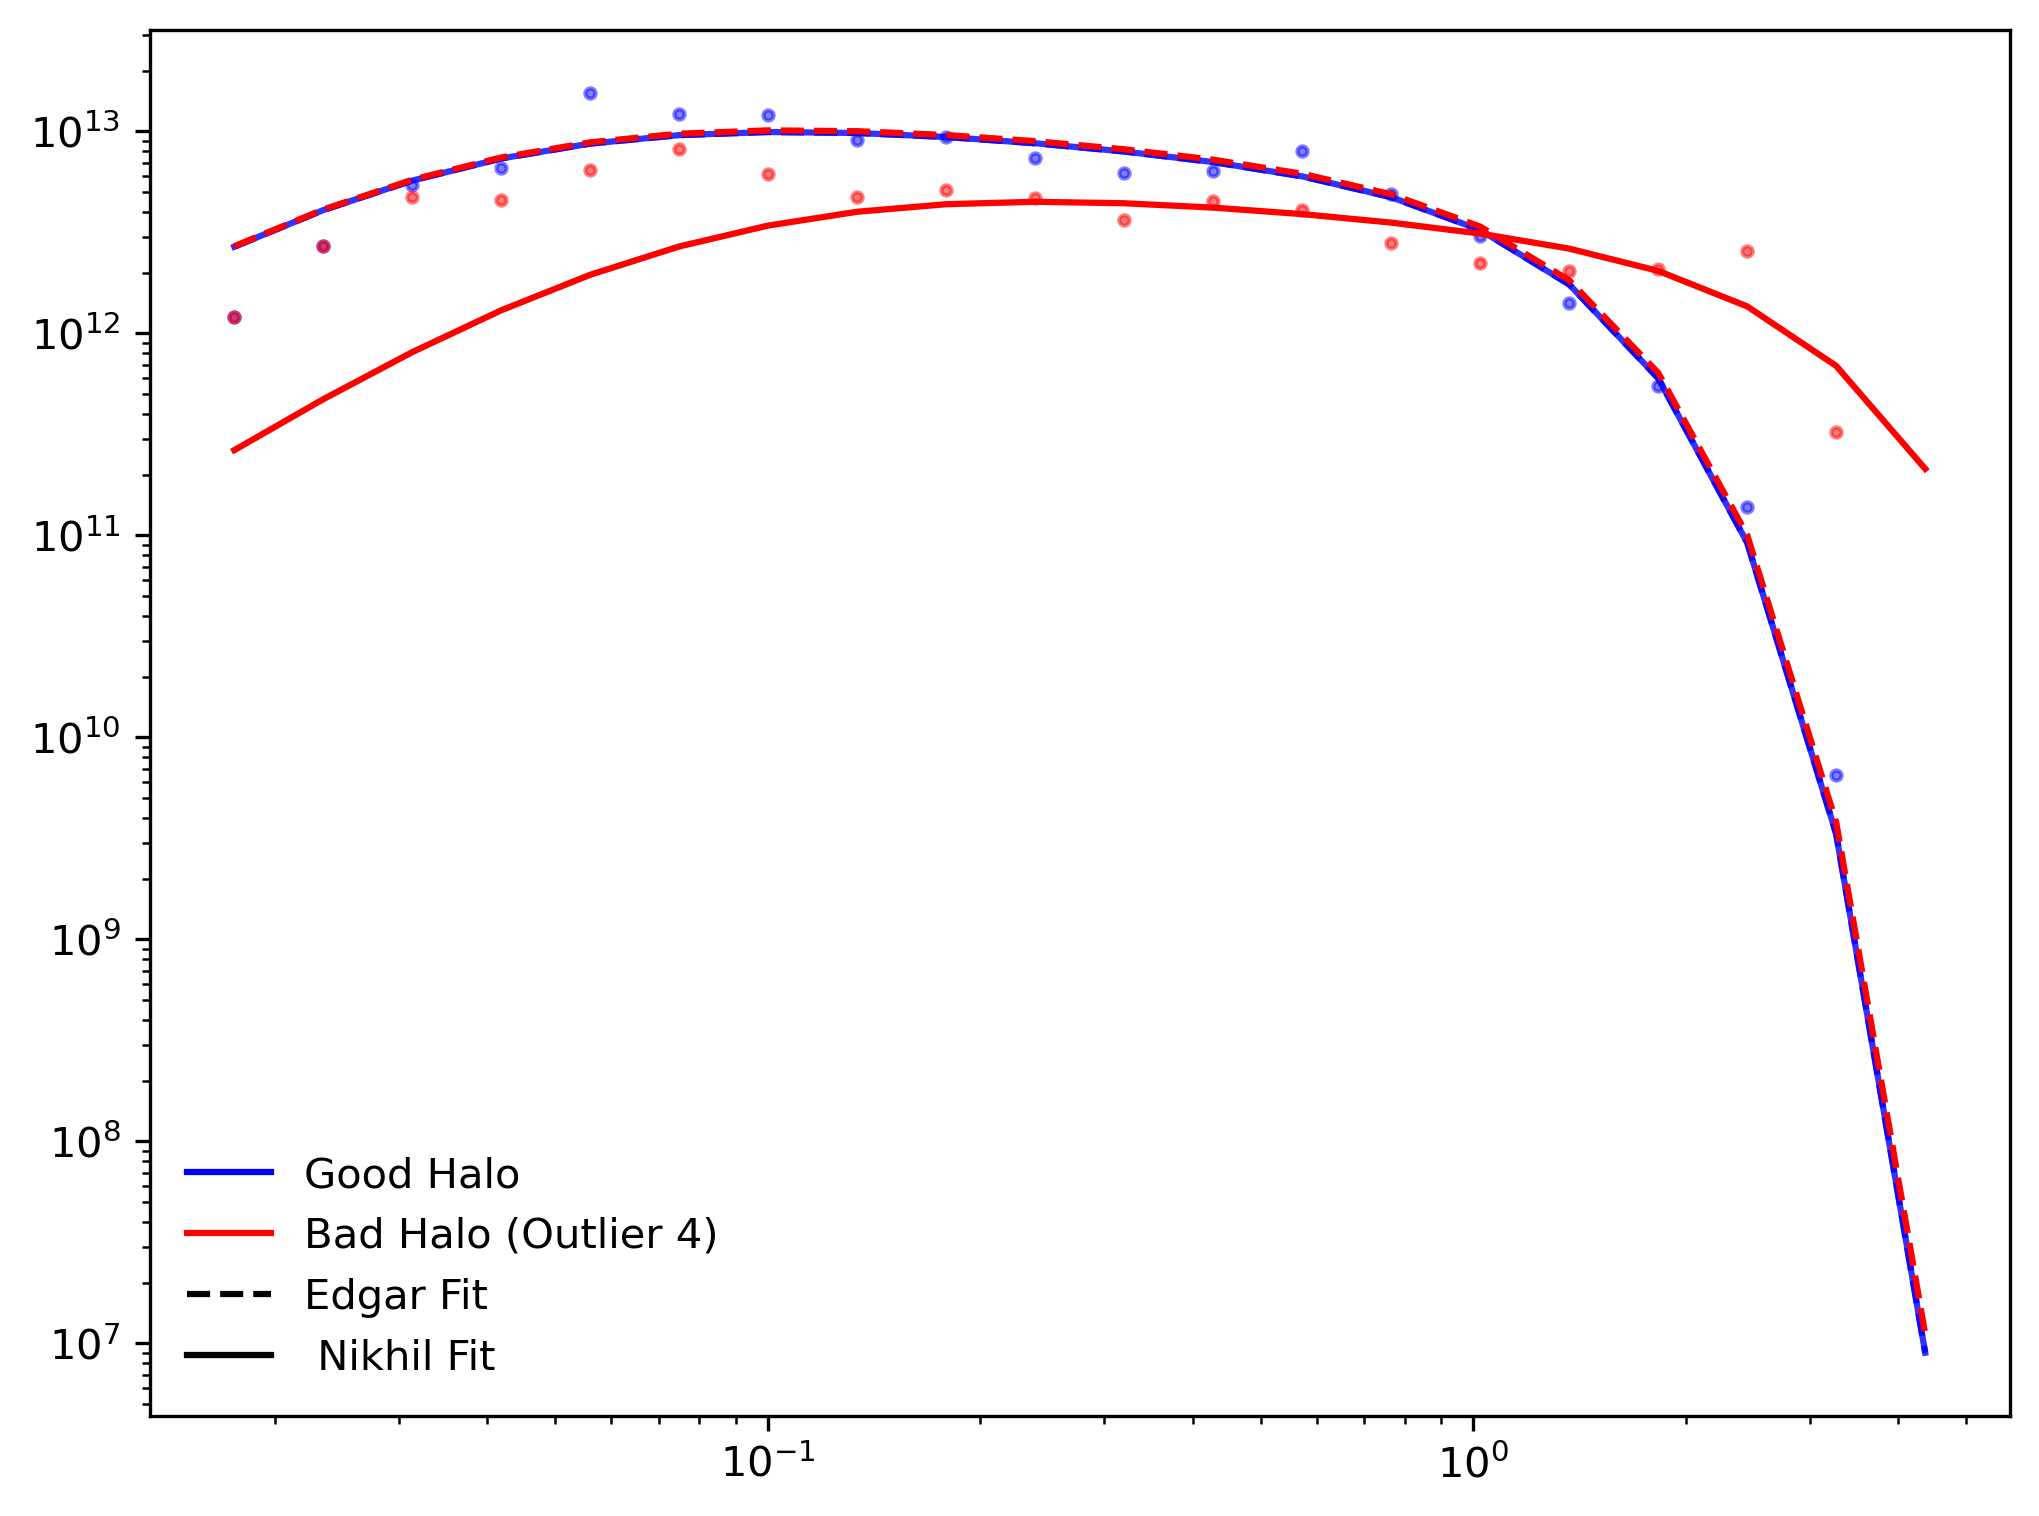

In [7]:
from constants import *
from functions import *
from imports import *

with h5.File('out/rh_bestfits.h5', 'r') as hdf:
    ids = hdf['HID'][:]
    morb = hdf['Morb'][:]
    rh = (hdf['rh'][:] / 1000) * (morb / PIVOT_MASS)**(0.221)
    rh_edgar = (843.8 / 1000) * (morb / PIVOT_MASS)**(0.221)
    rho = hdf['rho'][:]

mask_good = np.where(ids == 103677)
mask_bad = np.where(ids == 3062775)

plt.figure(figsize=(8, 6), dpi=300)

plt.plot(RADIUS, RADIUS**2 * rho_orb(morb[mask_good][0], r_h=rh[mask_good][0]), color='blue', alpha=0.8)
plt.plot(RADIUS, RADIUS**2 * rho_orb(morb[mask_good][0]), color='blue', alpha=0.8, linestyle='--')
plt.scatter(RADIUS, RADIUS**2 * rho[mask_good][0], s=6, color='blue', alpha=0.5, marker='o')

plt.plot(RADIUS, RADIUS**2 * rho_orb(morb[mask_bad][0], r_h=rh[mask_bad][0]), color='red')
plt.plot(RADIUS, RADIUS**2 * rho_orb(morb[mask_bad][0]), color='red', linestyle='--')
plt.scatter(RADIUS, RADIUS**2 * rho[mask_bad][0], s=6, color='red', alpha=0.5, marker='o')

plt.plot([], [], color='blue', label='Good Halo')
plt.plot([], [], color='red', label='Bad Halo (Outlier 4)')
plt.plot([], [], color='black', linestyle='--', label='Edgar Fit')
plt.plot([], [], color='black', label=' Nikhil Fit')

plt.xscale('log')
plt.yscale('log')

plt.legend(loc='lower left', frameon=False)

plt.show()

[ 9.24828103e-01  1.18198284e-01 -7.76160316e-02  9.71377682e+02]
[ 9.26840634e-01  1.12388743e-01 -8.90605158e-02  7.69158491e+02]
[ 9.31250887e-01  1.12497434e-01 -6.27968434e-02  5.20080334e+02]
[ 9.29451893e-01  1.01247962e-01 -5.18865063e-02  3.49021634e+02]
[ 9.26062476e-01  1.05550864e-01 -2.68312988e-02  2.18681716e+02]
[-1110.42025095  -177.72989244     1.52421896  -438.16404916]
[-251.51836868  -31.2787404     1.51898613 -171.01493584]
[ 9.33257879e-01  1.01145657e-01 -2.32709712e-04  2.84740430e+01]


/home/nikhilgaruda/anaconda3/envs/sims/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[ 0.9425332   0.09945097 -0.02544486 13.50641912]


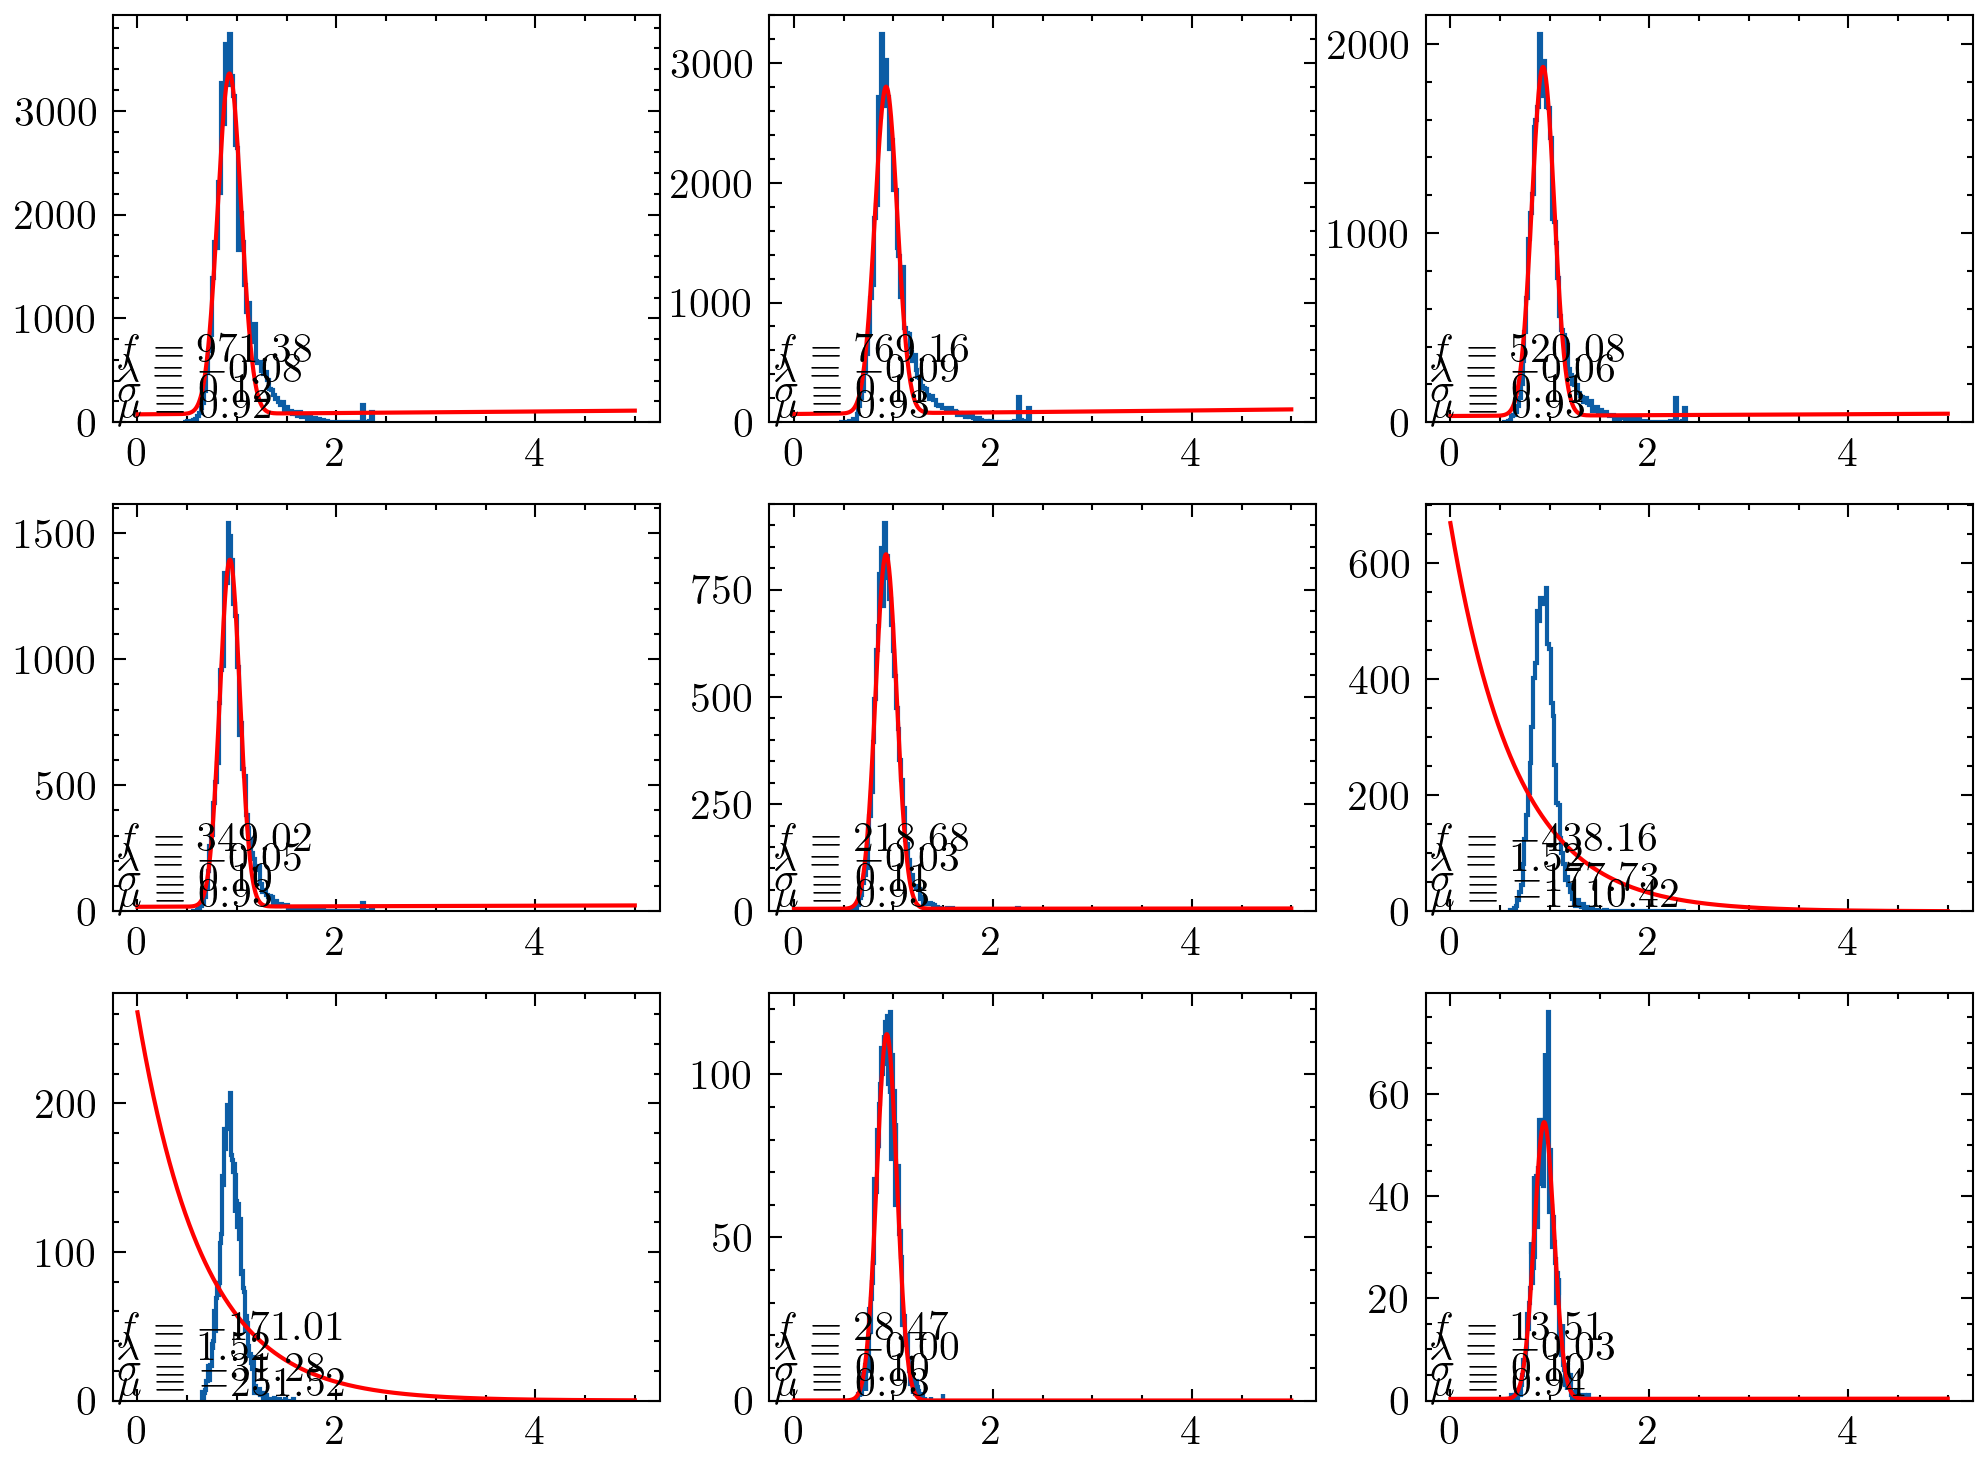

<Figure size 350x262.5 with 0 Axes>

In [4]:
def gaussian(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (((x - mu) / sigma) ** 2))
def exponential(x, lam):
    return lam * np.exp(-lam * x)
def curve_fitter(x, mu, sigma, lam, f):
    return f * gaussian(x, mu, sigma) + (1 - f) * exponential(x, lam)

fig = plt.figure(figsize=(8, 6), dpi=300)

for bin in range(MBINEDGES.shape[0] - 1):
    plt.subplot(3, 3, bin + 1)

    mask = (MBINEDGES[bin] < morb) & (morb < MBINEDGES[bin + 1])

    data, bins = np.histogram(rh[mask] / rh_edgar[mask], bins=100)
    bincenters = 0.5 * (bins[1:] + bins[:-1])

    from scipy.optimize import curve_fit

    popt, pcov = curve_fit(curve_fitter, bincenters, data)
    print(popt)

    plt.hist(rh[mask] / rh_edgar[mask], bins=100, fill=False, histtype='step')

    x = np.linspace(0, 5, 1000)
    plt.plot(x, curve_fitter(x, *popt), 'r-', label='fit')

    # text of the fit parameters
    plt.text(0.01, 0.01, r'$\mu = %.2f$' % popt[0], transform=plt.gca().transAxes)
    plt.text(0.01, 0.05, r'$\sigma = %.2f$' % popt[1], transform=plt.gca().transAxes)
    plt.text(0.01, 0.1, r'$\lambda = %.2f$' % popt[2], transform=plt.gca().transAxes)
    plt.text(0.01, 0.15, r'$f = %.2f$' % popt[3], transform=plt.gca().transAxes)


plt.show()
plt.clf()

Text(0, 0.5, '\\% of outliers')

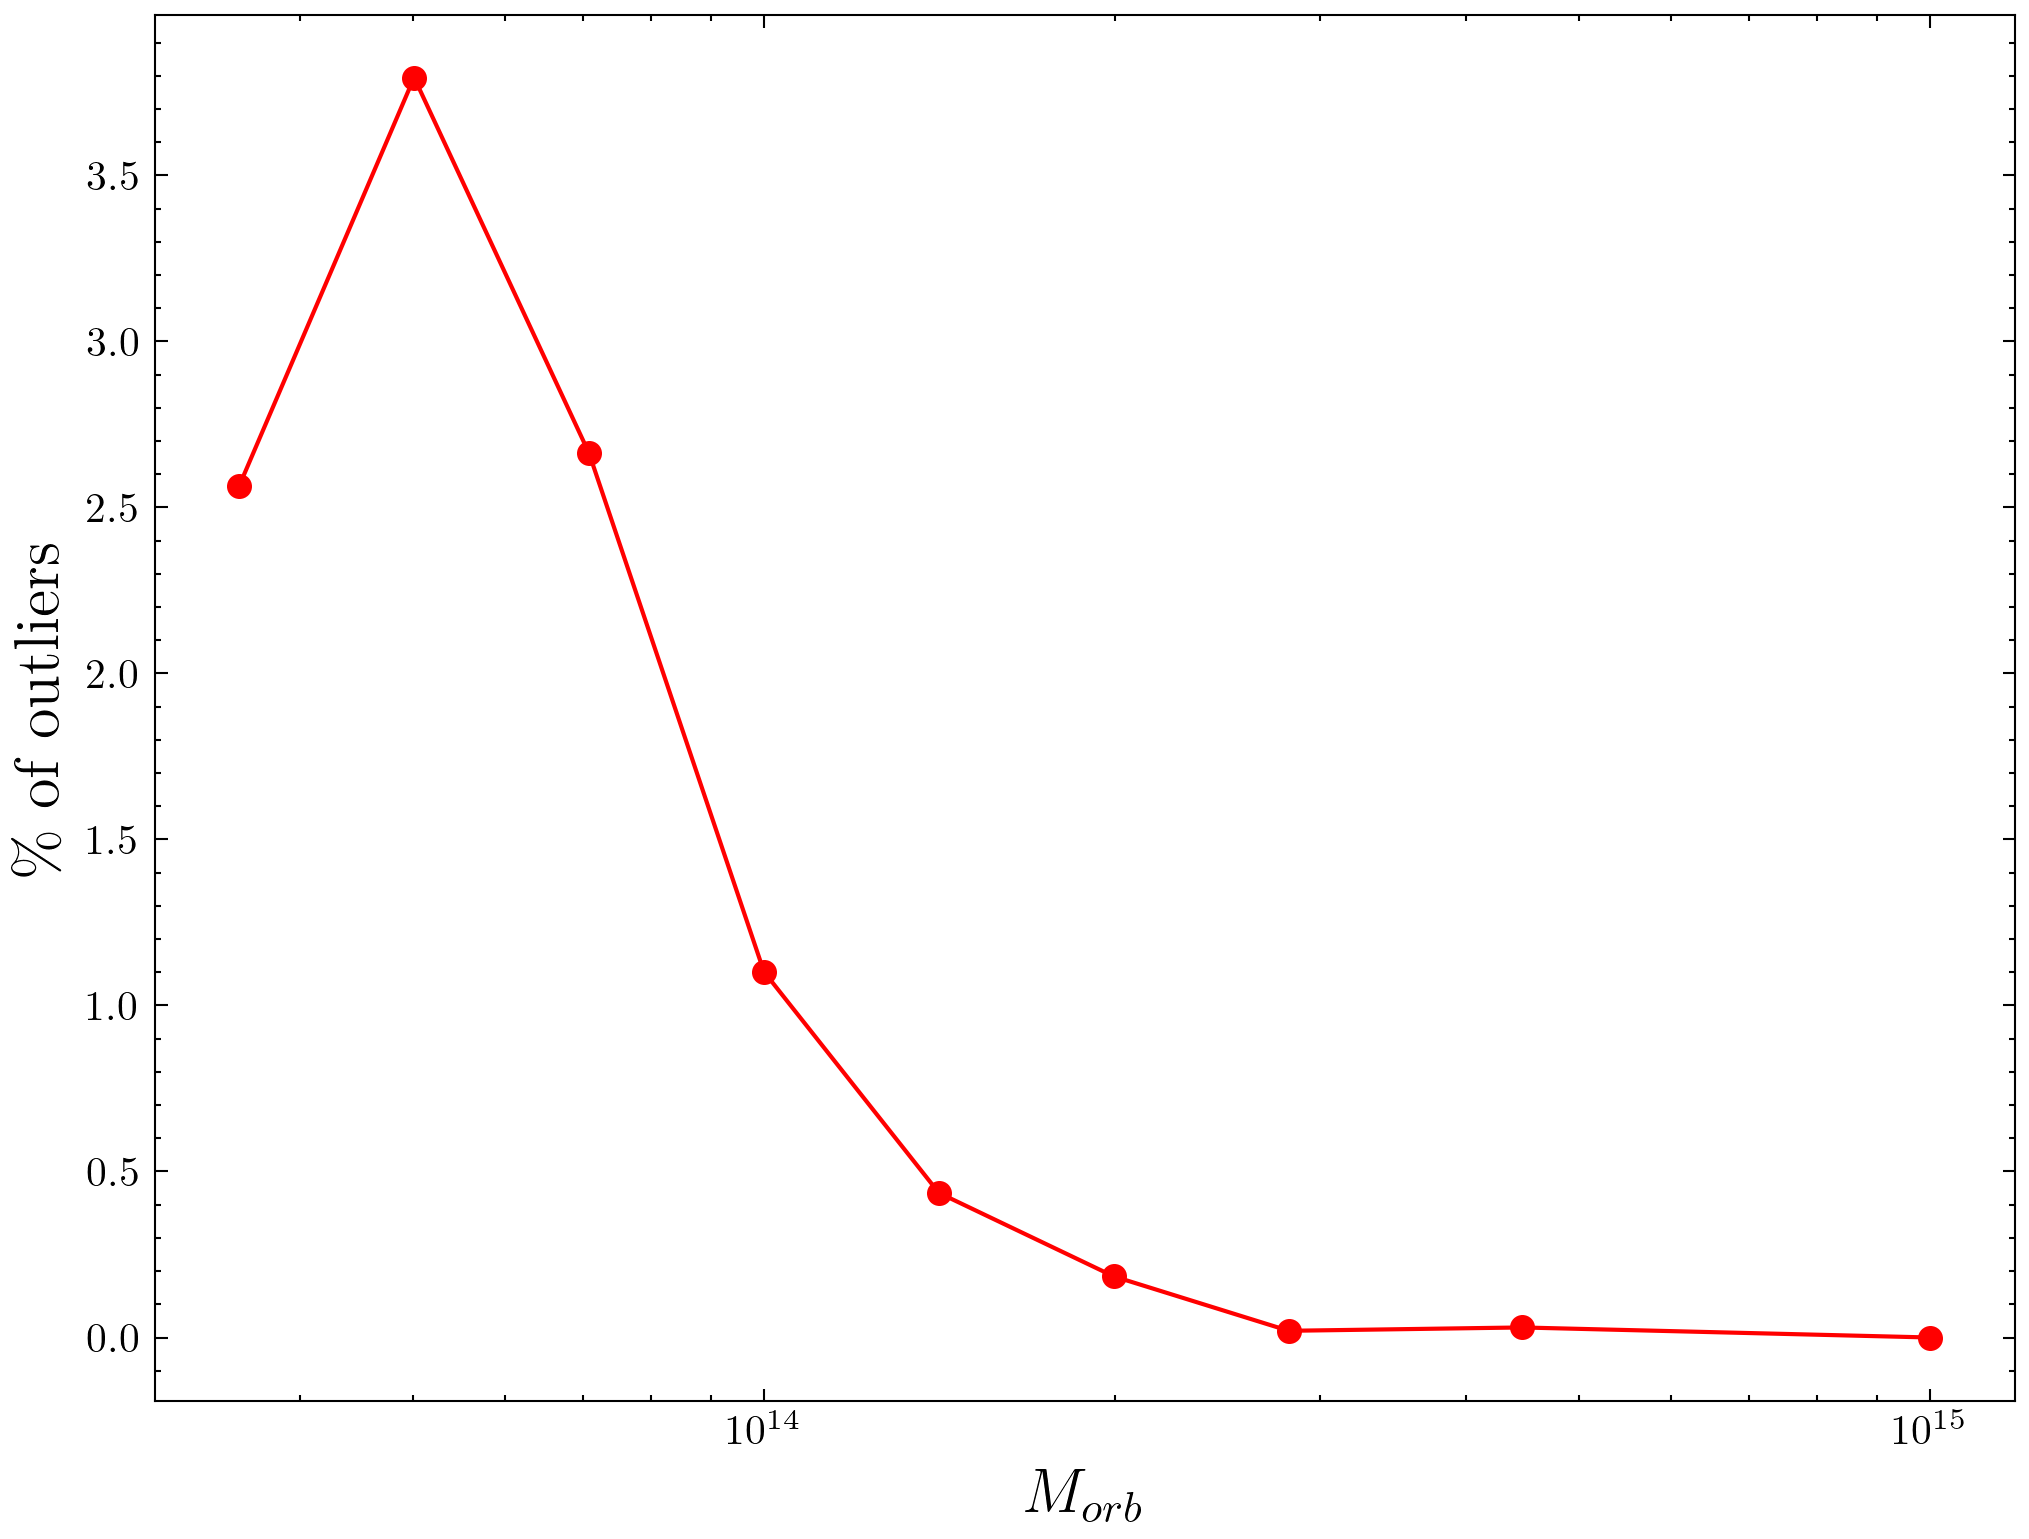

In [23]:
outliers_fraction = np.array([0.0256470628, 0.0379480995, 0.0266343062, 0.0110156213,  0.0043555293, 0.0018404908, 0.0002017756,  0.0003027551, 0]) * 100
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(MBINEDGES[1:], outliers_fraction, 'ro-', markersize=5)
plt.xscale('log')

plt.xlabel(r'$M_{orb}$', fontsize=15)
plt.ylabel(r'\% of outliers', fontsize=15)